# Classifying activity using wearable accelerometer data

### Data Source:  
http://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer

### Dataset Description:
There are 15 datasets, each corresponding to a different individual. Each dataset contains instances of uncalibrated measurements of the x,y, and z components of the acceleration, along with a numerical label from 1 thru 7, corresponding to the type of activity. The labels are defined as follows:

1. Working at Computer 
2. Standing Up, Walking and Going up\down stairs
3. Standing
4. Walking
5. Going Up\Down Stairs
6. Walking and Talking with Someone
7. Talking while Standing

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

#Loading each dataset to a dataframe
df1 = pd.read_csv("data/1.csv", header= None, names = ['Serial','x','y', 'z', 'label'])
df2 = pd.read_csv("data/2.csv",header= None, names = ["Serial","x","y", "z", "label"])
df3 = pd.read_csv("data/3.csv",header= None, names = ["Serial","x","y", "z", "label"])
df4 = pd.read_csv("data/4.csv",header= None, names = ["Serial","x","y", "z", "label"])
df5 = pd.read_csv("data/5.csv",header= None, names = ["Serial","x","y", "z", "label"])
df6 = pd.read_csv("data/6.csv",header= None, names = ["Serial","x","y", "z", "label"])
df7 = pd.read_csv("data/7.csv",header= None, names = ["Serial","x","y", "z", "label"])
df8 = pd.read_csv("data/8.csv",header= None, names = ["Serial","x","y", "z", "label"])
df9 = pd.read_csv("data/9.csv",header= None, names = ["Serial","x","y", "z", "label"])
df10 = pd.read_csv("data/10.csv",header= None, names = ["Serial","x","y", "z", "label"])
df11 = pd.read_csv("data/11.csv",header= None, names = ["Serial","x","y", "z", "label"])
df12 = pd.read_csv("data/12.csv",header= None, names = ["Serial","x","y", "z", "label"])
df13 = pd.read_csv("data/13.csv",header= None, names = ["Serial","x","y", "z", "label"])
df14 = pd.read_csv("data/14.csv",header= None, names = ["Serial","x","y", "z", "label"])
df15 = pd.read_csv("data/15.csv",header= None, names = ["Serial","x","y", "z", "label"])

### Preliminary data exploration

We plot the frequency of labels in the combined data and find that the labels are highly unbalanced. 
The dominant labels are 1, 7, 4, and 3.

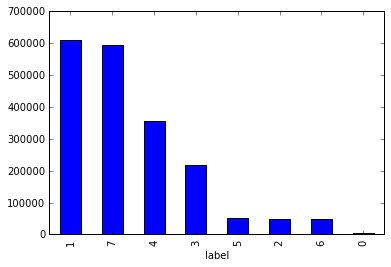

In [18]:
%matplotlib inline
dtotal = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]) #Combine all of the data
dtotal.groupby('label').size().sort_values(ascending = False).plot(kind = 'bar')


### Model building
#### Training and testing the classifier
For each dataset, we build a model that does the best job at classifying the labels based on the features x,y, and z.
We try three different classification techhniques: Logistic regression, Support Vector Machines, and Random Forest.
The Random Forest classifier yields the highest accuracy on the validation set.

#### Trying new features
We examined the possibility of improving performance by by including additional features derived from x,y,z :
1. Total accelaration: sqrt(x^2+y^2+z^2)
2. Ratio of x to y: x/y*
3. Ratio of y to z: y/z
4. Ratio of x to z: x/z
5. Total horizontal acceleration: sqrt(x^2+y^2)
6. Slope of the acceleration vector wrt the horizontal plane: z/sqrt(x^2+y^2)

We found no improvement in performance by including one or more of these additional features. On the contary, we found a slight drop in the overall accuracy. So we restrict ourselves to the original features x,y, and z.

*We verified that none of the values of x,y, and z was 0 anywhere in the data, thereby eliminating any division by zero concerns.

#### Splitting the data into features and target vectors

In [55]:
dfn = df7#Choose the dataset to work with
dfn =dfn.reindex(np.random.permutation(dfn.index)) #Shuffle the rows
dfn = dfn[dfn.label != 0] #Remove any rows with label 0
#dfn['tot'] = np.sqrt(dfn.x**2 + dfn.y**2+ dfn.z**2) #Include the total acceleration as a new feature
#dfn['slope'] = dfn.z/np.sqrt(dfn.x**2 + dfn.y**2) #Include the total horizontal acceleration as a new feature
#dfn['x-yratio'] = dfn.x/dfn.y #Include the ratio of x and y accelerations as a new feature
#dfn['y-zratio'] = dfn.y/dfn.z #Include the ratio of y and z accelerations as a new feature
#dfn['z-xratio'] = dfn.z/dfn.x #Include the ratio of z and x accelerations as a new feature
labelsn = dfn.label
featuresn = dfn.drop(['Serial','label'], axis =1, inplace = False)

In [56]:
clf =RandomForestClassifier(n_estimators =100, min_samples_split = 5, random_state = 42)
features = featuresn
labels = labelsn
#Splitting the datan into training and testing set
features_train1, features_test1, labels_train1, labels_test1 = cross_validation.train_test_split(features, labels, test_size=0.3, random_state = 42)
clf.fit(features_train1,labels_train1) 
pred = clf.predict(features_test1) 
print "accuracy =", accuracy_score(labels_test1, pred)

accuracy = 0.880613496933


### Result
We built classifiers for each of the 15 datasets individually, and obtained accuracy scores ranging from 76% to 89% on the test sets.

### Analyzing performance

In [57]:
from sklearn.metrics import confusion_matrix as cf, classification_report as cr
print(cr(labels_test1,pred))

             precision    recall  f1-score   support

          1       0.93      0.97      0.95      9793
          2       0.44      0.12      0.19      1098
          3       0.66      0.56      0.61      3152
          4       0.76      0.82      0.79      8025
          5       0.55      0.29      0.38       850
          6       0.36      0.09      0.14       768
          7       0.94      0.98      0.96     25214

avg / total       0.86      0.88      0.87     48900



#### Confusion matrix

In [58]:
print cf(labels_test1,pred)

[[ 9494   112    14   142     3     1    27]
 [  420   134   106   376     9     6    47]
 [   11    15  1780   728   113    15   490]
 [  222    37   476  6596    47    42   605]
 [    2     2   146   366   246     8    80]
 [    0     3    46   178    13    66   462]
 [    9     1   114   284    16    44 24746]]


#### Observations
Our models do a reasonably good job at classifying user activity based on accelarometer data. Further work could focus on improving the lowest performing labels, particularly 2 and 6. As noted earlier, those labels are among the least abundant labels in the data, and therefore the model likely suffers from insufficient training in recognizing them.
This is reflected in the unusually low recall for labels 2 and 6, which was universally observed in all datasets.

Additionally, label 2 (Standing Up, Walking and Going up\down stairs) presents an inherent ambiguity by definition, as it overlaps with labels 3(Standing),4(Walking), and 5(Going up\down stairs), which further contributes to the model's underperformance in this sector.